In [1]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import json
import functions as myF
from consts.consts import model_name, optimizer_name, valid_dir,checkpoint_path


In [2]:
model, optimizer, criterion, dataloaders,  hyper_params = myF.load_rabak_network_checkpoint(checkpoint_path)

In [3]:
# import importlib

# importlib.reload(myF)

In [4]:
myF.train(model, dataloaders['train'], dataloaders['validate'], criterion, optimizer, hyper_params['epochs'])

Epoch 1 / 4 Training Loss: 0.644 Test Loss: 0.295 Test Accuracy: 0.919
Epoch 1 / 4 Training Loss: 0.570 Test Loss: 0.286 Test Accuracy: 0.924


KeyboardInterrupt: 

In [5]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

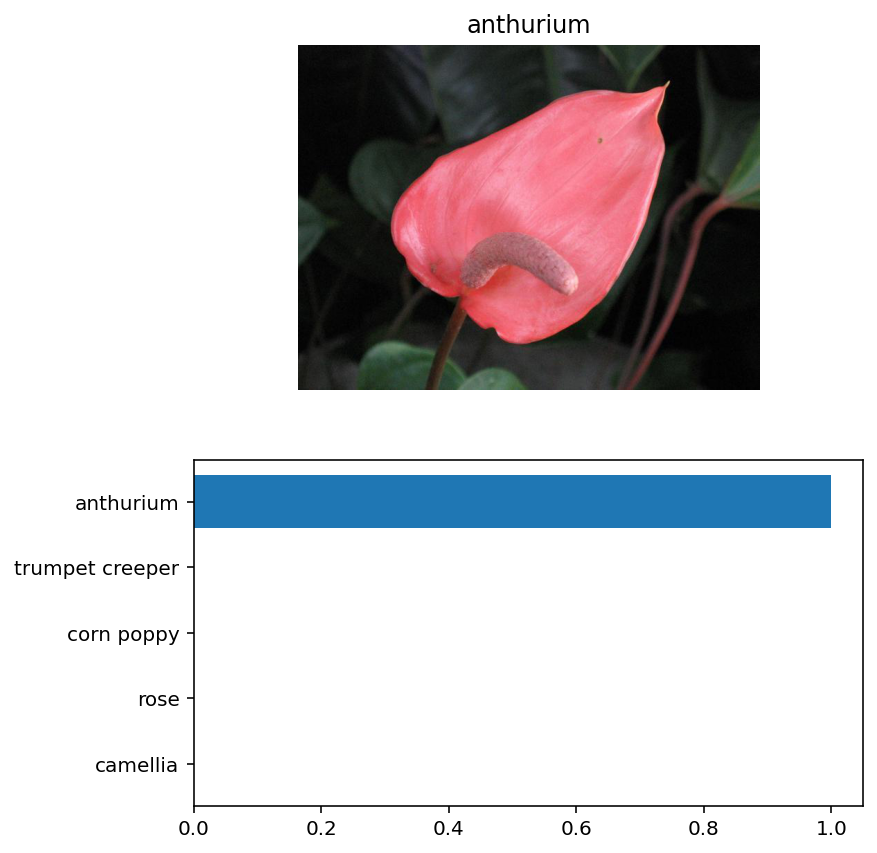

In [8]:
test_image, label_dir =  myF.get_random_image_and_label(valid_dir)
test_image = valid_dir + "/" + label_dir + "/" + test_image

predictions, classes = myF.predict(test_image, model)
myF.display_prediction(classes, cat_to_name, predictions, test_image, label_dir)

In [7]:
model.hyper_params = hyper_params
myF.save_model(model, model_name, optimizer,optimizer_name, criterion, dataloaders, checkpoint_path)